In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
from google.colab import files
uploaded =files.upload()


Saving bruno-mars.txt to bruno-mars.txt


In [10]:
tokenizer = Tokenizer(oov_token='OOV')

data = open('bruno-mars.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'OOV': 1, 'you': 2, 'i': 3, 'the': 4, 'me': 5, 'it': 6, 'to': 7, 'oh': 8, 'my': 9, 'and': 10, 'a': 11, 'for': 12, 'yeah': 13, 'in': 14, 'on': 15, 'so': 16, 'up': 17, 'what': 18, 'all': 19, "i'm": 20, 'like': 21, 'your': 22, 'that': 23, 'got': 24, "don't": 25, 'no': 26, 'know': 27, 'just': 28, 'we': 29, 'her': 30, 'is': 31, 'do': 32, 'baby': 33, 'be': 34, 'girl': 35, 'but': 36, 'she': 37, "it's": 38, 'this': 39, 'when': 40, "you're": 41, 'if': 42, 'of': 43, "'cause": 44, 'go': 45, 'take': 46, 'now': 47, 'can': 48, 'with': 49, 'out': 50, 'love': 51, 'are': 52, "that's": 53, 'way': 54, 'get': 55, 'see': 56, 'make': 57, 'say': 58, "i'll": 59, 'time': 60, 'here': 61, 'too': 62, 'one': 63, 'tell': 64, 'long': 65, "can't": 66, 'feel': 67, 'night': 68, 'come': 69, 'ooh': 70, 'wanna': 71, 'never': 72, 'been': 73, 'que': 74, 'show': 75, 'down': 76, 'at': 77, 'where': 78, 'better': 79, 'gimme': 80, 'more': 81, 'want': 82, 'back': 83, 'only': 84, 'uh': 85, 'right': 86, 'look': 87, 'run': 88, 'giv

In [13]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [14]:
print(xs[6])
print(ys[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  47 526   7   4 134 361  77]
[0. 0. 0. ... 0. 0. 0.]


In [15]:
print(tokenizer.word_index)

{'OOV': 1, 'you': 2, 'i': 3, 'the': 4, 'me': 5, 'it': 6, 'to': 7, 'oh': 8, 'my': 9, 'and': 10, 'a': 11, 'for': 12, 'yeah': 13, 'in': 14, 'on': 15, 'so': 16, 'up': 17, 'what': 18, 'all': 19, "i'm": 20, 'like': 21, 'your': 22, 'that': 23, 'got': 24, "don't": 25, 'no': 26, 'know': 27, 'just': 28, 'we': 29, 'her': 30, 'is': 31, 'do': 32, 'baby': 33, 'be': 34, 'girl': 35, 'but': 36, 'she': 37, "it's": 38, 'this': 39, 'when': 40, "you're": 41, 'if': 42, 'of': 43, "'cause": 44, 'go': 45, 'take': 46, 'now': 47, 'can': 48, 'with': 49, 'out': 50, 'love': 51, 'are': 52, "that's": 53, 'way': 54, 'get': 55, 'see': 56, 'make': 57, 'say': 58, "i'll": 59, 'time': 60, 'here': 61, 'too': 62, 'one': 63, 'tell': 64, 'long': 65, "can't": 66, 'feel': 67, 'night': 68, 'come': 69, 'ooh': 70, 'wanna': 71, 'never': 72, 'been': 73, 'que': 74, 'show': 75, 'down': 76, 'at': 77, 'where': 78, 'better': 79, 'gimme': 80, 'more': 81, 'want': 82, 'back': 83, 'only': 84, 'uh': 85, 'right': 86, 'look': 87, 'run': 88, 'giv

In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=20, verbose=1)
#print model.summary()
print(model)


Epoch 1/20
739/739 [==============================] - 351s 475ms/step - loss: 5.8352 - accuracy: 0.0935
Epoch 2/20
739/739 [==============================] - 354s 479ms/step - loss: 4.1090 - accuracy: 0.2600
Epoch 3/20
739/739 [==============================] - 353s 477ms/step - loss: 3.0582 - accuracy: 0.3901
Epoch 4/20
739/739 [==============================] - 354s 479ms/step - loss: 2.4280 - accuracy: 0.4750
Epoch 5/20
739/739 [==============================] - 353s 477ms/step - loss: 2.0343 - accuracy: 0.5367
Epoch 6/20
739/739 [==============================] - 352s 476ms/step - loss: 1.7813 - accuracy: 0.5836
Epoch 7/20
739/739 [==============================] - 352s 477ms/step - loss: 1.5711 - accuracy: 0.6235
Epoch 8/20
739/739 [==============================] - 358s 484ms/step - loss: 1.4407 - accuracy: 0.6485
Epoch 9/20
739/739 [==============================] - 354s 478ms/step - loss: 1.3386 - accuracy: 0.6706
Epoch 10/20
739/739 [==============================] - 366s 495m

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

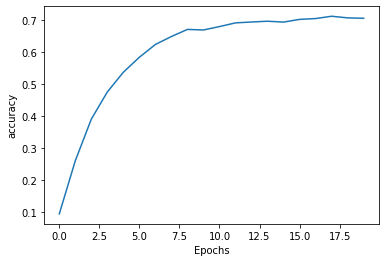

In [18]:
plot_graphs(history, 'accuracy')

In [20]:
seed_text = "I'll be"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I'll be ok tomorrow me and my baby i spent all my money if you want it fight feel like i've been
